In [1]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import folium
import time
from IPython.display import display
%matplotlib inline
matplotlib.style.use('ggplot')

/Users/XueqiWang/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### The number of accident in different time of a day in each year

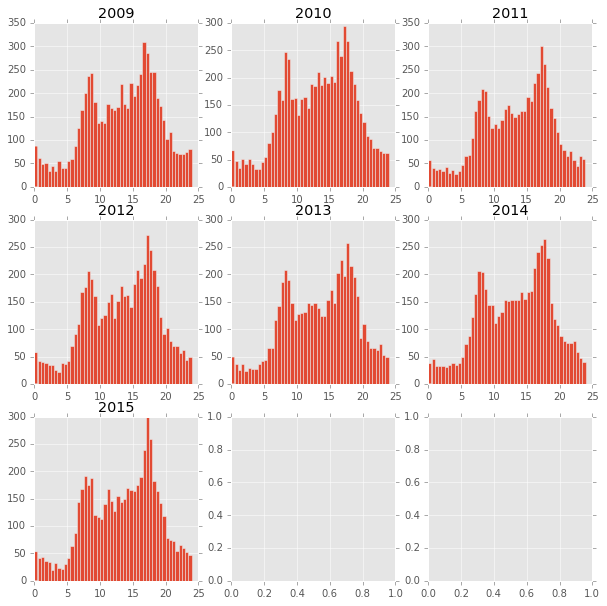

In [2]:
years = ['2009', '2010', '2011', '2012', '2013', '2014', '2015']
nfig = 0
fig, axes = plt.subplots(nrows=3, ncols=3)
for year in years:
    df = pd.read_csv('data2/Accidents_'+ year +'.csv',low_memory=False)
    
    times = df['Time'].values
    n = len(times)
    hour = pd.Series([0.0]*n)
    i = 0
    for t in times:
        hm = t.split(':')
        hour[i] = float(hm[0]) + float(hm[1])/60
        i+=1
    hour.hist(bins = 48, ax=axes[int(nfig/3), nfig%3], figsize = (10,10))
    axes[int(nfig/3), nfig%3].set_title(year);
    nfig+=1

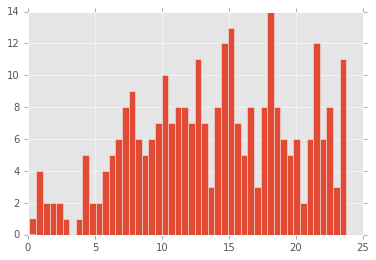

In [5]:
df = pd.read_csv('data2/Accidents_2014.csv',low_memory=False)
df1 = df[df['Special_Conditions_at_Site']==4]
times = df1['Time'].values
n = len(times)
hour = pd.Series([0.0]*n)
i = 0
for t in times:
    hm = t.split(':')
    hour[i] = float(hm[0]) + float(hm[1])/60
    i+=1
hour.hist(bins = 48)

###  The number of accident in different time of a day under the condition of roadworks in each year

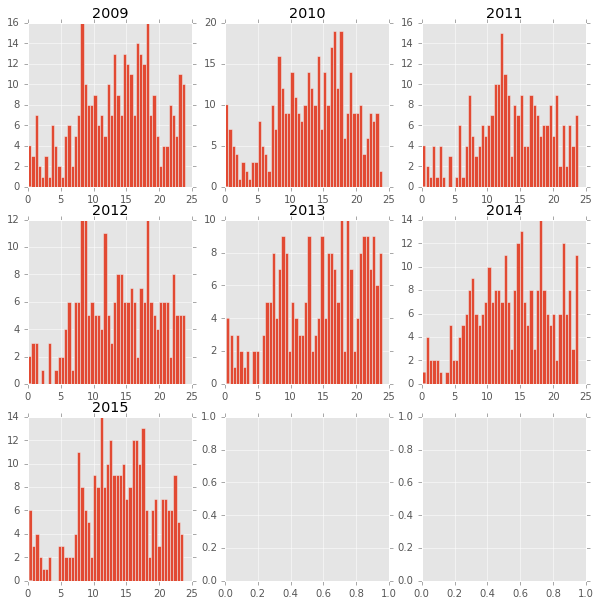

In [6]:
years = ['2009', '2010', '2011', '2012', '2013', '2014', '2015']
nfig = 0
fig, axes = plt.subplots(nrows=3, ncols=3)
for year in years:
    df = pd.read_csv('data2/Accidents_'+ year +'.csv',low_memory=False)
    df = df[df['Special_Conditions_at_Site']==4]
    times = df['Time'].values
    n = len(times)
    hour = pd.Series([0.0]*n)
    i = 0
    for t in times:
        hm = t.split(':')
        hour[i] = float(hm[0]) + float(hm[1])/60
        i+=1
    hour.hist(bins = 48, ax=axes[int(nfig/3), nfig%3], figsize = (10,10))
    axes[int(nfig/3), nfig%3].set_title(year);
    nfig+=1

#### Accident with roadworks at site accumulate during these years

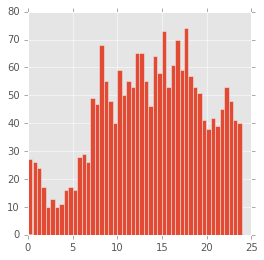

In [10]:
years = ['2009', '2010', '2011', '2012', '2013', '2014', '2015']
for year in years:
    df = pd.read_csv('data2/Accidents_'+ year +'.csv',low_memory=False)
    df = df[df['Special_Conditions_at_Site']==4]
    times = df['Time'].values
    n = len(times)
    hour = pd.Series([0.0]*n)
    i = 0
    for t in times:
        hm = t.split(':')
        hour[i] = float(hm[0]) + float(hm[1])/60
        i+=1
    if year == '2009':
        all_acci = hour
    else:
        all_acci = all_acci.append(hour)
    
all_acci.hist(bins = 48, figsize = (4,4))
    

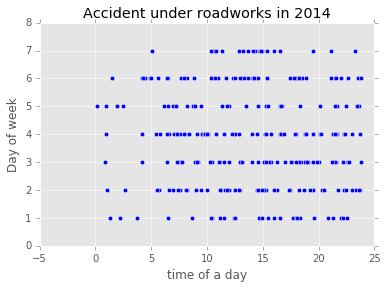

In [9]:
df = pd.read_csv('data2/Accidents_2014.csv',low_memory=False)
df1 = df[df['Special_Conditions_at_Site']==4]
times = df1['Time'].values
day = df1['Day_of_Week'].values
n = len(times)
hour = np.array([0.0]*n)
i = 0
for t in times:
    hm = t.split(':')
    hour[i] = float(hm[0]) + float(hm[1])/60
    i+=1
plt.scatter(hour,day)
plt.title('Accident under roadworks in 2014')
plt.ylabel('Day of week')
plt.xlabel('time of a day')

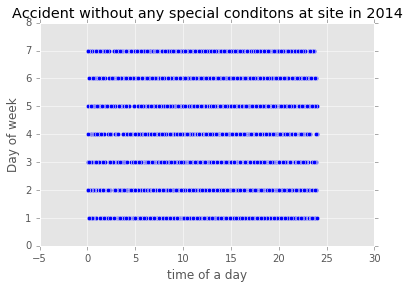

In [10]:
df = pd.read_csv('data2/Accidents_2014.csv',low_memory=False)
df1 = df[df['Special_Conditions_at_Site'] == 0]
times = df1['Time'].values
day = df1['Day_of_Week'].values
n = len(times)
hour = np.array([0.0]*n)
i = 0
for t in times:
    hm = t.split(':')
    hour[i] = float(hm[0]) + float(hm[1])/60
    i+=1
plt.scatter(hour,day)
plt.title('Accident without any special conditons at site in 2014')
plt.ylabel('Day of week')
plt.xlabel('time of a day')

### The number of accidents in different time of a day and in different day of a week in 2014

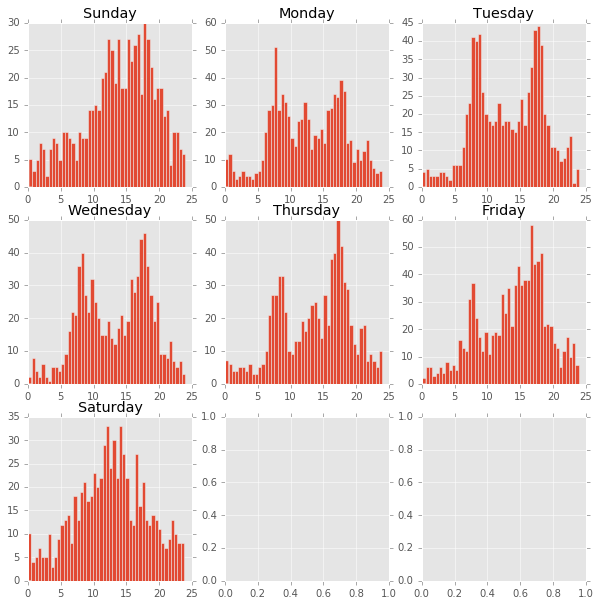

In [17]:
week = range(1,8)
day_of_week = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
nfig = 0
fig, axes = plt.subplots(nrows=3, ncols=3)
for day in week:
    df = pd.read_csv('data2/Accidents_2014.csv',low_memory=False)
    df = df[df['Day_of_Week']==day]
    times = df['Time'].values
    n = len(times)
    hour = pd.Series([0.0]*n)
    i = 0
    for t in times:
        hm = t.split(':')
        hour[i] = float(hm[0]) + float(hm[1])/60
        i+=1
    hour.hist(bins = 48, ax=axes[int(nfig/3), nfig%3], figsize = (10,10))
    axes[int(nfig/3), nfig%3].set_title(day_of_week[day-1]);
    nfig+=1

### Accidents on Sunday in each year

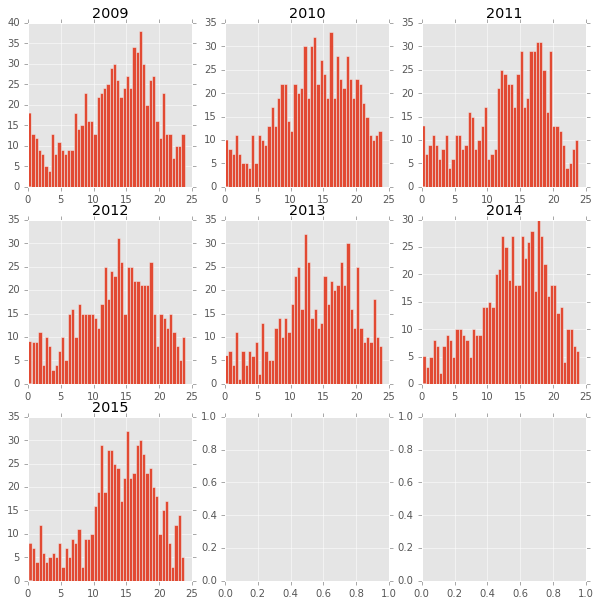

In [18]:
years = ['2009', '2010', '2011', '2012', '2013', '2014', '2015']
nfig = 0
fig, axes = plt.subplots(nrows=3, ncols=3)
for year in years:
    df = pd.read_csv('data2/Accidents_'+ year +'.csv',low_memory=False)
    df = df[df['Day_of_Week']==1]
    times = df['Time'].values
    n = len(times)
    hour = pd.Series([0.0]*n)
    i = 0
    for t in times:
        hm = t.split(':')
        hour[i] = float(hm[0]) + float(hm[1])/60
        i+=1
    hour.hist(bins = 48, ax=axes[int(nfig/3), nfig%3], figsize = (10,10))
    axes[int(nfig/3), nfig%3].set_title(year);
    nfig+=1

### The number of accidents on  each day of week

Accident on Sunday


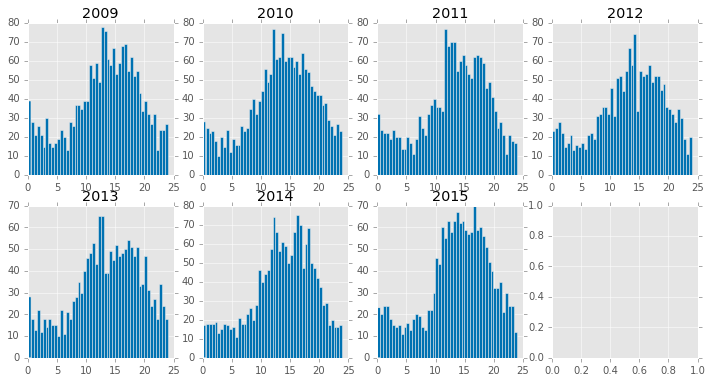

Accident on Monday


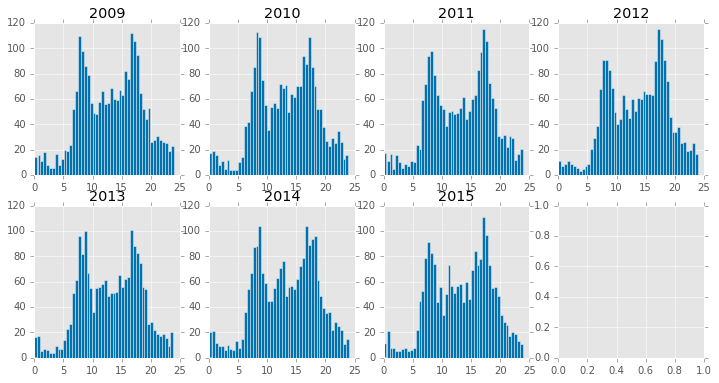

Accident on Tuesday


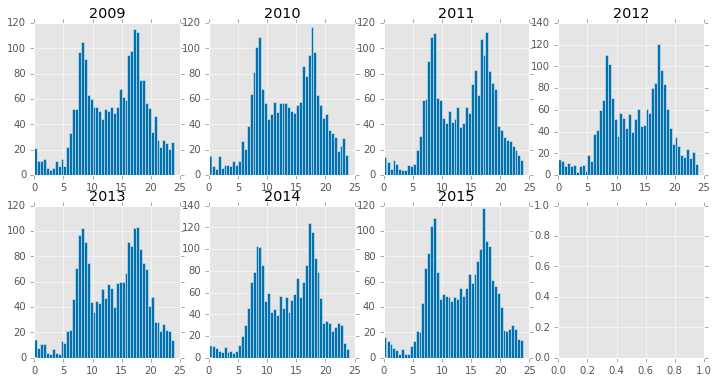

Accident on Wednesday


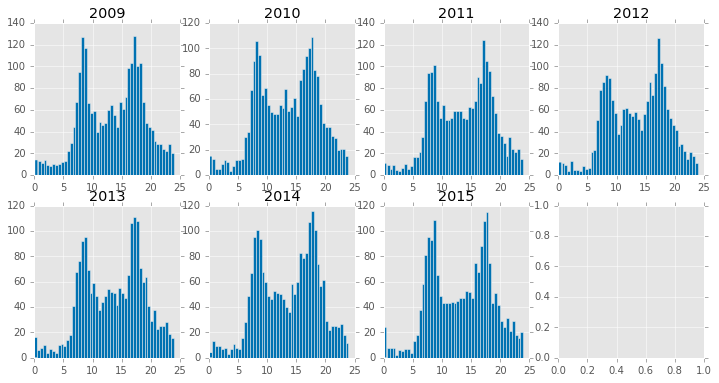

Accident on Thursday


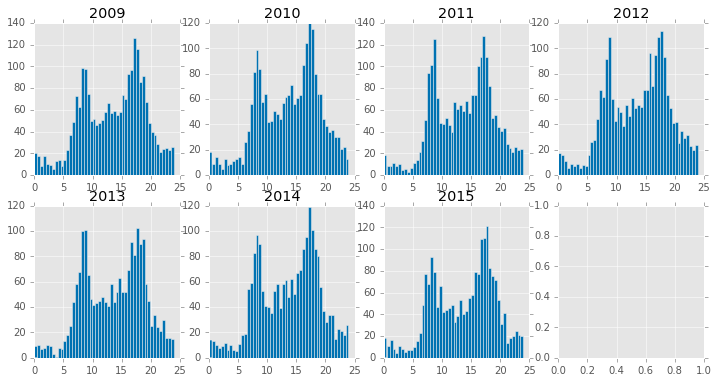

Accident on Friday


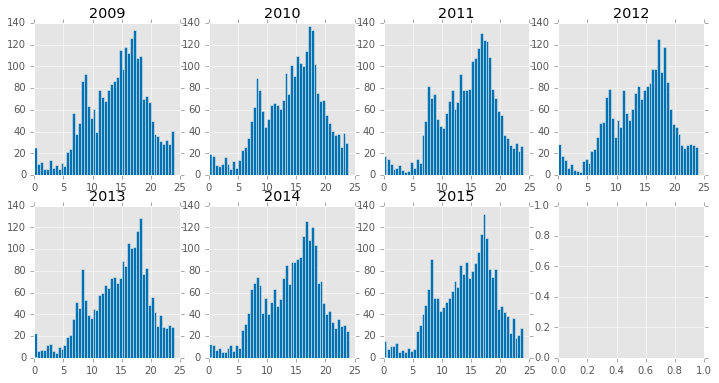

Accident on Saturday


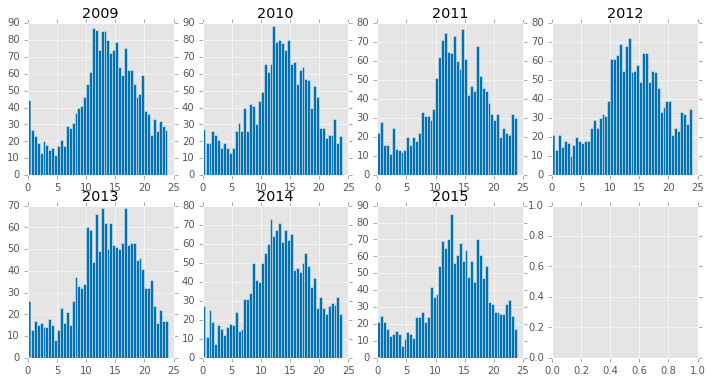

In [10]:
week = range(1,8)
day_of_week = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
for day in week:
    print "Accident on " + day_of_week[day-1]
    years = ['2009', '2010', '2011', '2012', '2013', '2014', '2015']
    nfig = 0
    fig, axes = plt.subplots(nrows=2, ncols=4)
    for year in years:
        df = pd.read_csv('data2/Accidents_SelectedRoad'+ year +'.csv',low_memory=False)
        df = df[df['Day_of_Week']==day]
        times = df['Time'].values
        n = len(times)
        hour = pd.Series([0.0]*n)
        i = 0
        for t in times:
            hm = t.split(':')
            hour[i] = float(hm[0]) + float(hm[1])/60
            i+=1
        hour.hist(bins = 48, ax=axes[int(nfig/4), nfig%4], figsize = (12,6), color = '#0072B2')
        axes[int(nfig/4), nfig%4].set_title(year);
        nfig+=1
    plt.savefig('image/w_' + day_of_week[day-1] + '.eps',format="eps",transparent=True, bbox_inches='tight', pad_inches=0.1)
    plt.show()

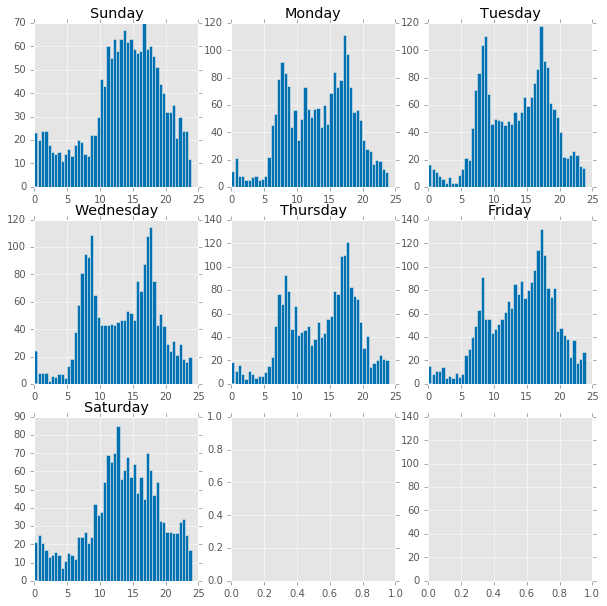

In [2]:
week = range(1,8)
day_of_week = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df = pd.read_csv('data2/Accidents_SelectedRoad2015.csv',low_memory=False)
fig, axes = plt.subplots(nrows=3, ncols=3)
nfig = 0
for day in week:
    df1 = df[df['Day_of_Week']==day]
    times = df1['Time'].values
    n = len(times)
    hour = pd.Series([0.0]*n)
    i = 0
    for t in times:
        hm = t.split(':')
        hour[i] = float(hm[0]) + float(hm[1])/60
        i+=1
    hour.hist(bins = 48, ax=axes[int(nfig/3), nfig%3], figsize = (10,10),color = '#0072B2')
    axes[int(nfig/3), nfig%3].set_title(day_of_week[nfig]);
    plt.ylim((0,140))
    nfig+=1
plt.savefig('image/time48_weekday_2015.eps',format="eps",transparent=True, bbox_inches='tight', pad_inches=0.1)

## The number of accident on each day of week under the condition of roadworks

Accident on Sunday - with roadworks at site


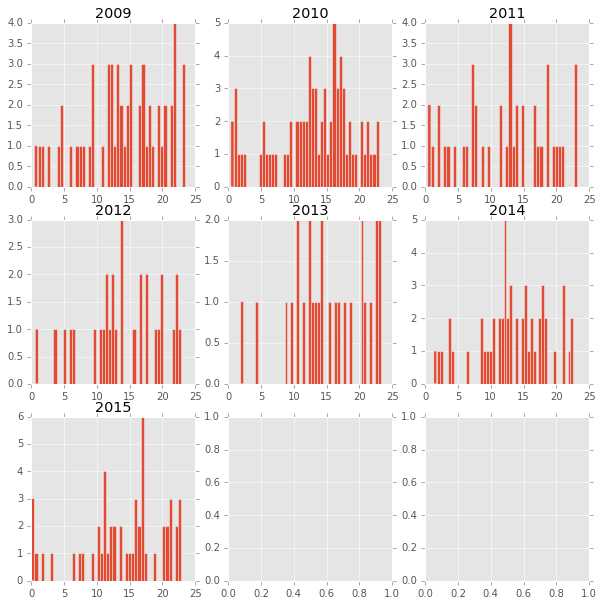

Accident on Monday - with roadworks at site


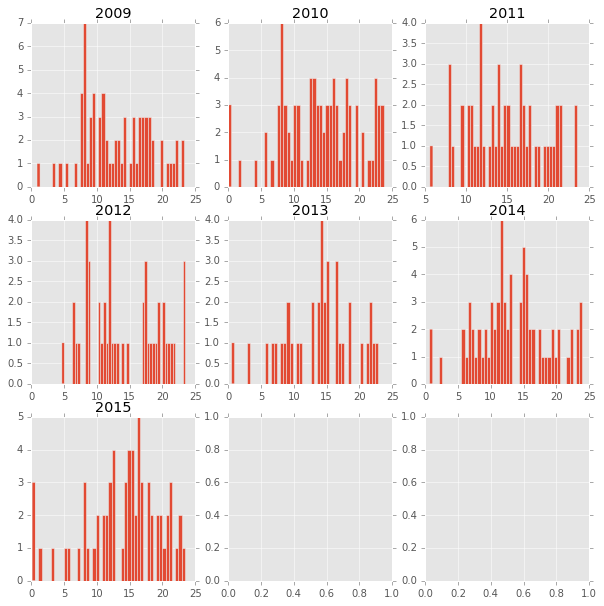

Accident on Tuesday - with roadworks at site


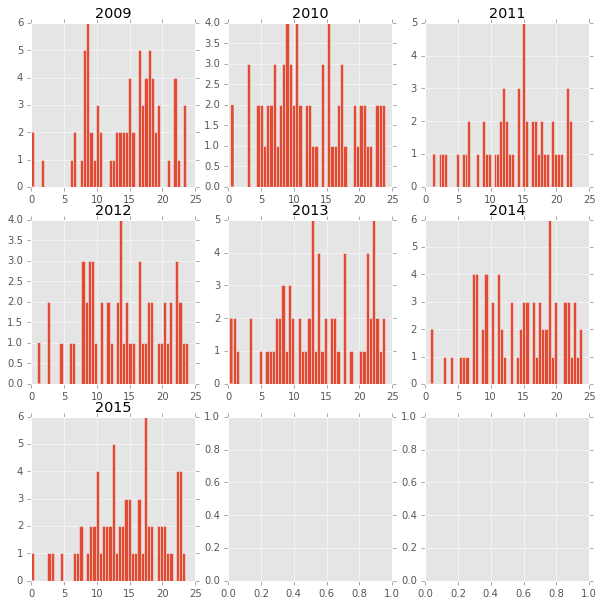

Accident on Wednesday - with roadworks at site


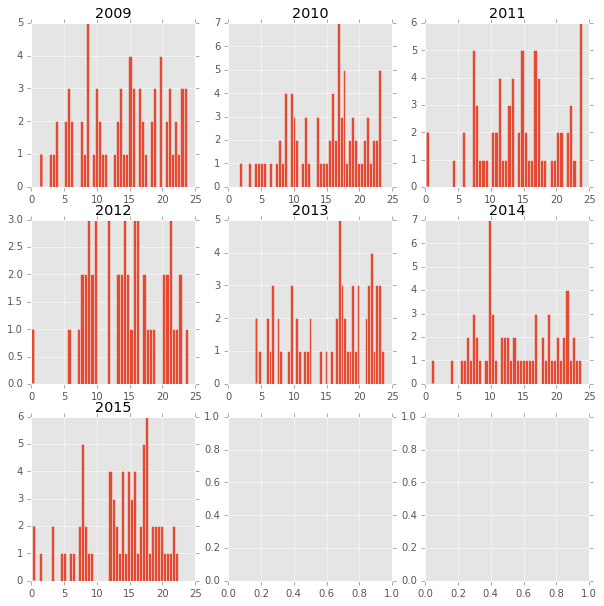

Accident on Thursday - with roadworks at site


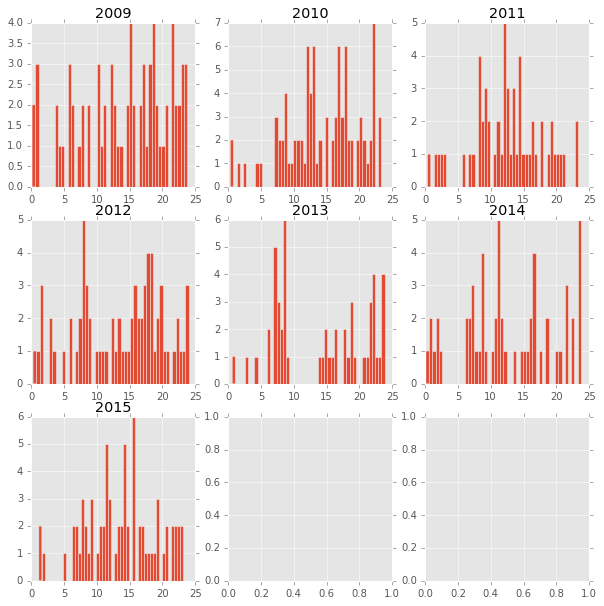

Accident on Friday - with roadworks at site


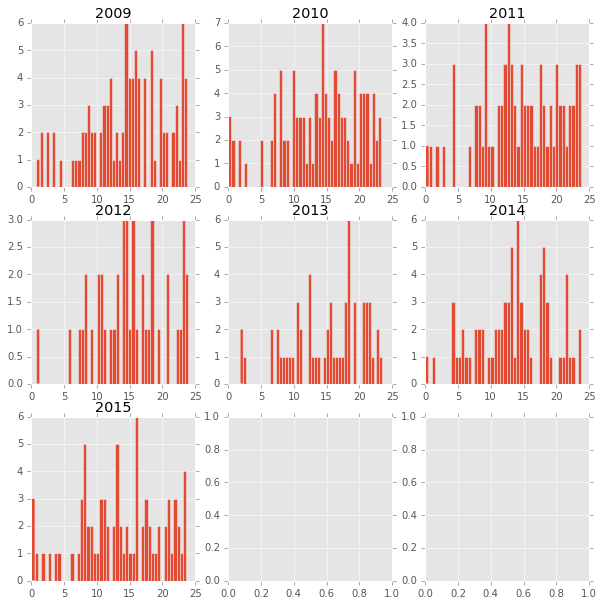

Accident on Saturday - with roadworks at site


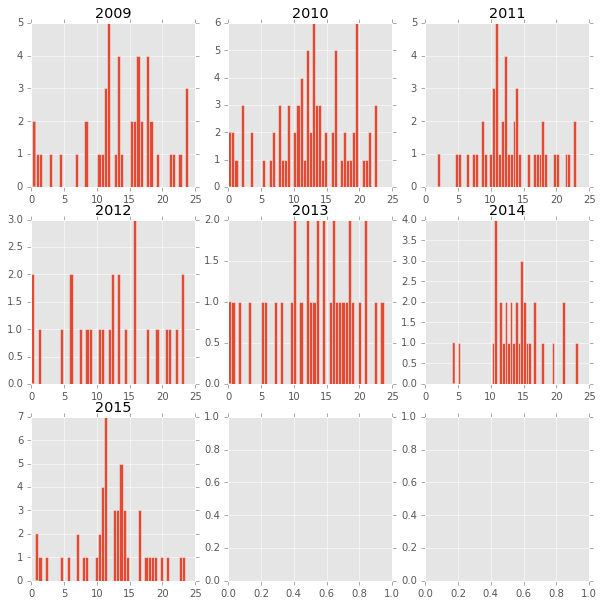

In [4]:
week = range(1,8)
day_of_week = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
for day in week:
    print "Accident on " + day_of_week[day-1] + " - with roadworks at site"
    years = ['2009', '2010', '2011', '2012', '2013', '2014', '2015']
    nfig = 0
    fig, axes = plt.subplots(nrows=3, ncols=3)
    for year in years:
        df = pd.read_csv('data2/Accidents_SelectedRoad'+ year +'.csv',low_memory=False)
        df = df[df['Special_Conditions_at_Site'] == 4]
        df = df[df['Day_of_Week']==day]
        times = df['Time'].values
        n = len(times)
        hour = pd.Series([0.0]*n)
        i = 0
        for t in times:
            hm = t.split(':')
            hour[i] = float(hm[0]) + float(hm[1])/60
            i+=1
        hour.hist(bins = 48, ax=axes[int(nfig/3), nfig%3], figsize = (10,10))
        axes[int(nfig/3), nfig%3].set_title(year);
        nfig+=1
    plt.show()

The amount of data of accidents with roadworks at site is limited.  

### expand dataset to all roads

Accident on Sunday - with roadworks at site


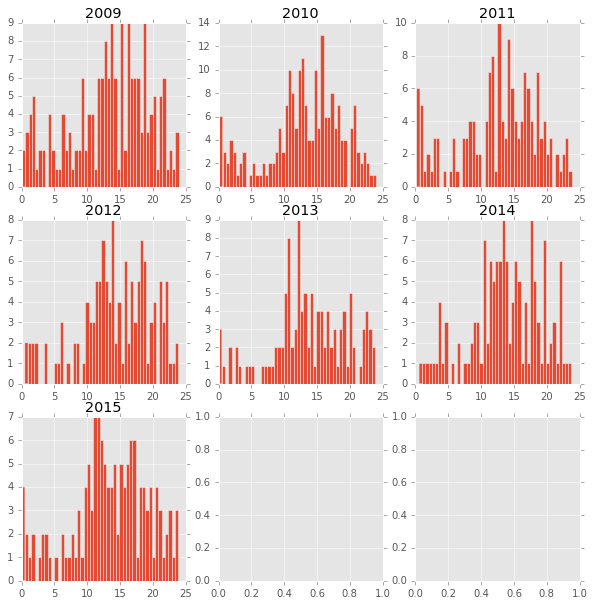

Accident on Monday - with roadworks at site


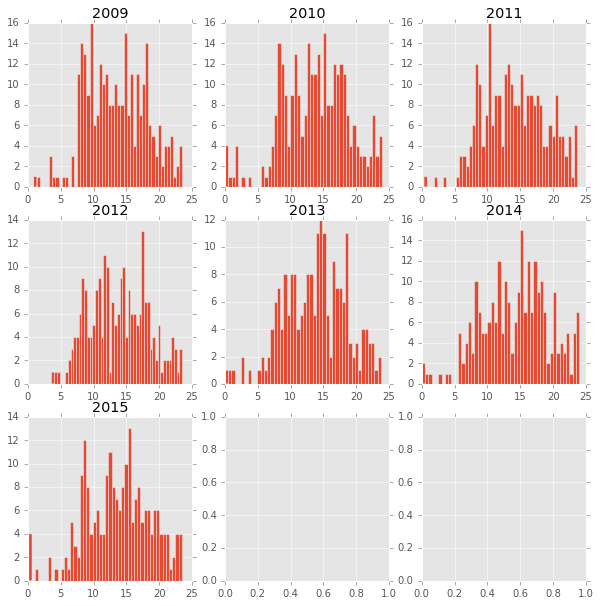

Accident on Tuesday - with roadworks at site


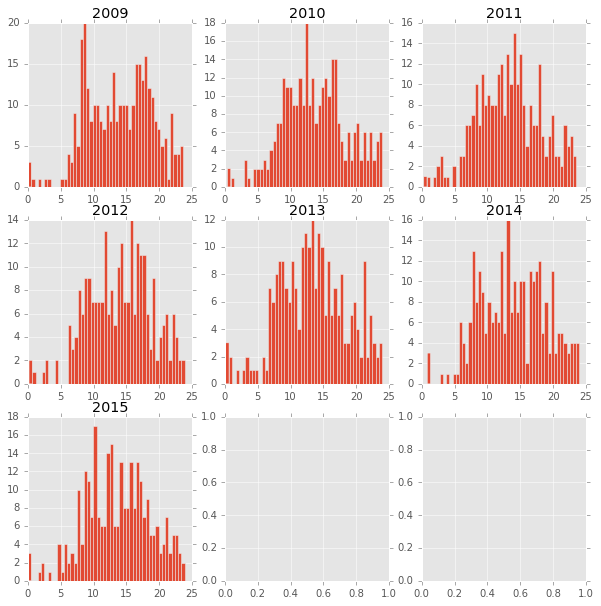

Accident on Wednesday - with roadworks at site


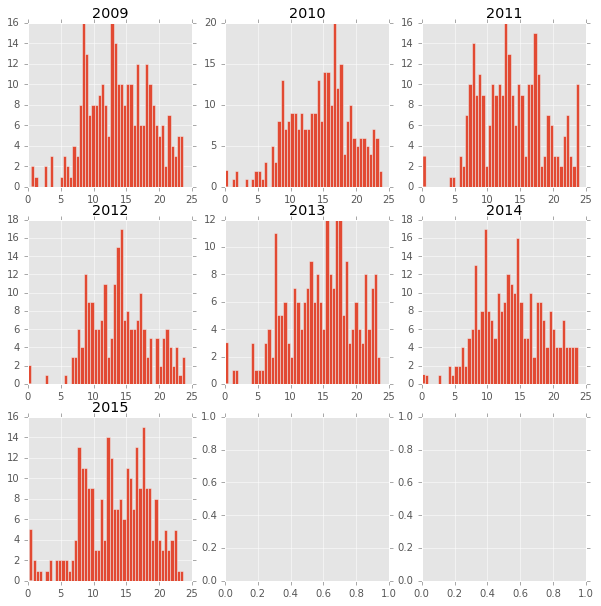

Accident on Thursday - with roadworks at site


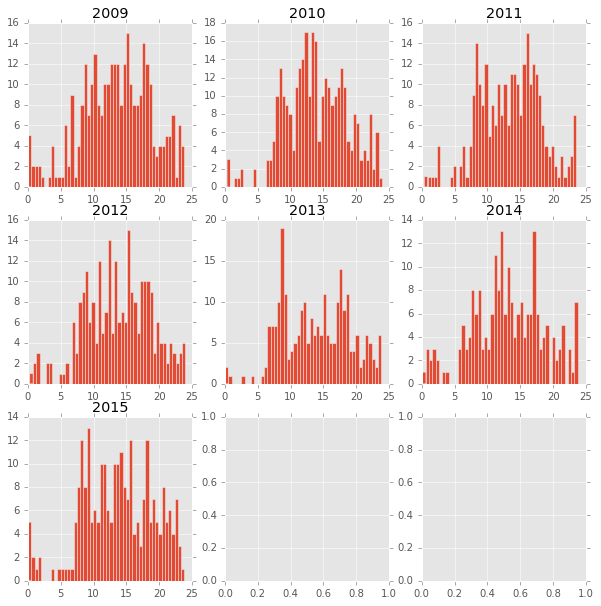

Accident on Friday - with roadworks at site


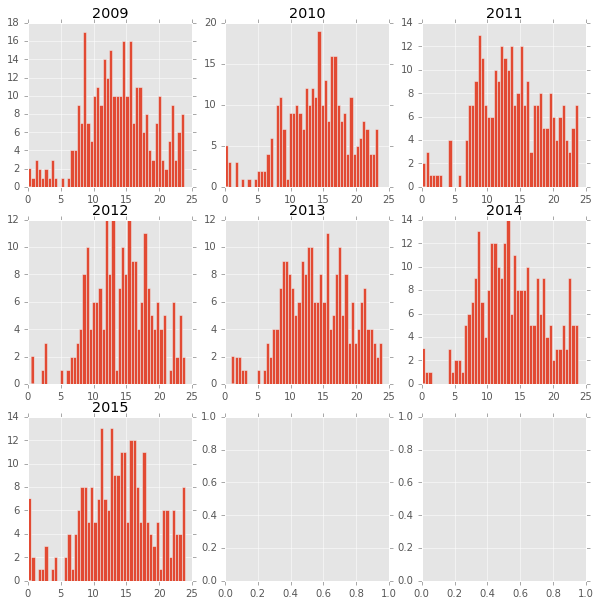

Accident on Saturday - with roadworks at site


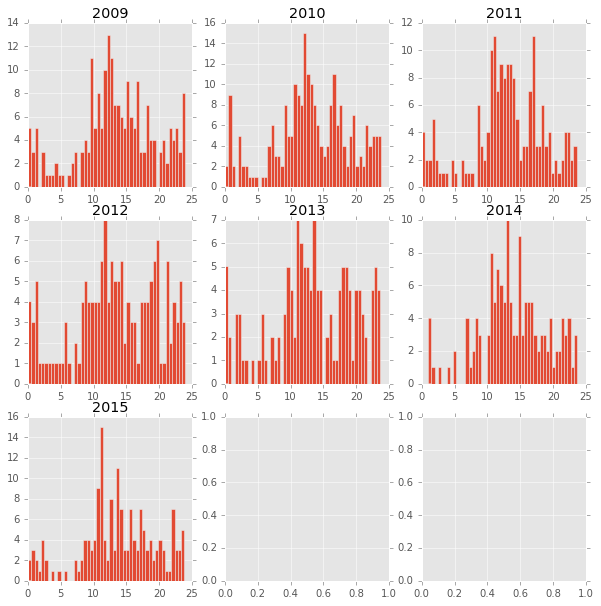

In [3]:
week = range(1,8)
day_of_week = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
for day in week:
    print "Accident on " + day_of_week[day-1] + " - with roadworks at site"
    years = ['2009', '2010', '2011', '2012', '2013', '2014', '2015']
    nfig = 0
    fig, axes = plt.subplots(nrows=3, ncols=3)
    for year in years:
        df = pd.read_csv('data/DfTRoadSafety_Accidents_'+ year +'.csv',low_memory=False)
        df = df[df['Special_Conditions_at_Site'] == 4]
        df = df[df['Day_of_Week']==day]
        times = df['Time'].values
        n = len(times)
        hour = pd.Series([0.0]*n)
        i = 0
        for t in times:
            hm = t.split(':')
            hour[i] = float(hm[0]) + float(hm[1])/60
            i+=1
        hour.hist(bins = 48, ax=axes[int(nfig/3), nfig%3], figsize = (10,10))
        axes[int(nfig/3), nfig%3].set_title(year);
        nfig+=1
    plt.show()

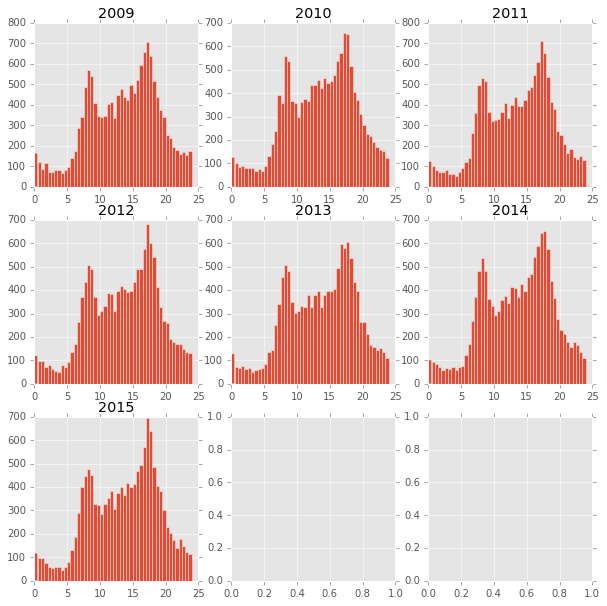

In [6]:
years = ['2009', '2010', '2011', '2012', '2013', '2014', '2015']
nfig = 0
fig, axes = plt.subplots(nrows=3, ncols=3)
for year in years:
    df = pd.read_csv('data2/Accidents_SelectedRoad'+ year +'.csv',low_memory=False)
    df = df[df['Special_Conditions_at_Site'] == 0]  ## no special conditions at site
    times = df['Time'].values
    n = len(times)
    hour = pd.Series([0.0]*n)
    i = 0
    for t in times:
        hm = t.split(':')
        hour[i] = float(hm[0]) + float(hm[1])/60
        i+=1
    hour.hist(bins = 48, ax=axes[int(nfig/3), nfig%3], figsize = (10,10))
    axes[int(nfig/3), nfig%3].set_title(year);
    nfig+=1

Road work + all day

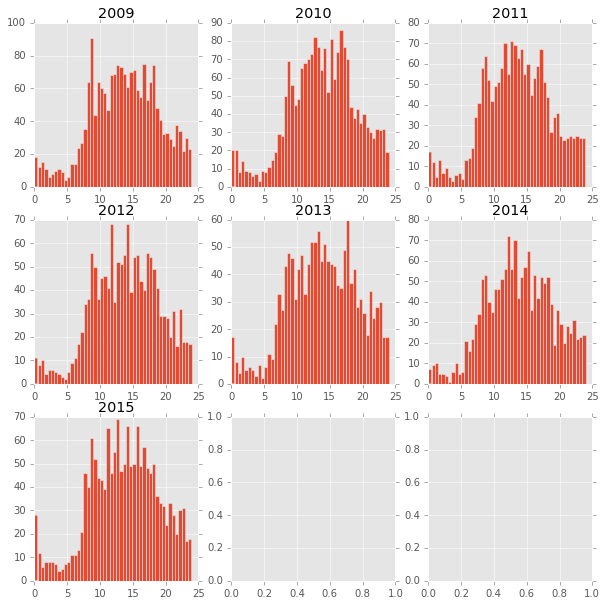

In [4]:
years = ['2009', '2010', '2011', '2012', '2013', '2014', '2015']
nfig = 0
fig, axes = plt.subplots(nrows=3, ncols=3)
for year in years:
    df = pd.read_csv('data/DfTRoadSafety_Accidents_'+ year +'.csv',low_memory=False)
    df = df[df['Special_Conditions_at_Site'] == 4]
    times = df['Time'].values
    n = len(times)
    hour = pd.Series([0.0]*n)
    i = 0
    for t in times:
        hm = t.split(':')
        hour[i] = float(hm[0]) + float(hm[1])/60
        i+=1
    hour.hist(bins = 48, ax=axes[int(nfig/3), nfig%3], figsize = (10,10))
    axes[int(nfig/3), nfig%3].set_title(year);
    nfig+=1

Urban or rural area

Urban area
Urban area
Urban area
Urban area
Urban area
Urban area
Urban area


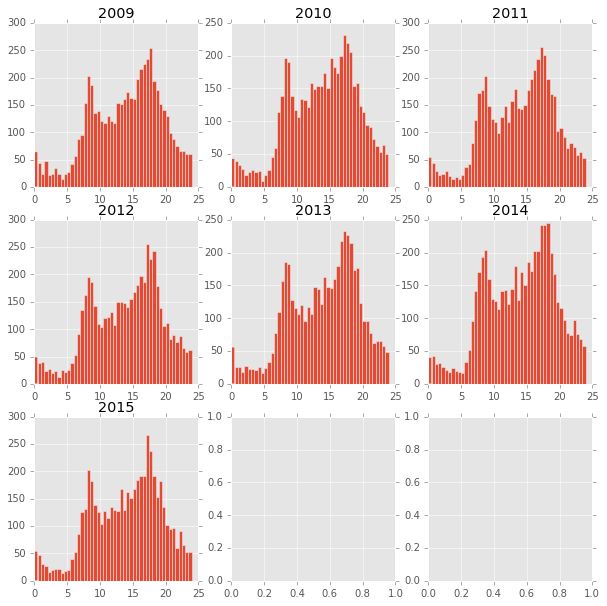

In [3]:
years = ['2009', '2010', '2011', '2012', '2013', '2014', '2015']
nfig = 0
fig, axes = plt.subplots(nrows=3, ncols=3)
print 'Urban area'
for year in years:
    df = pd.read_csv('data2/Accidents_SelectedRoad'+ year +'.csv',low_memory=False)
    df = df[df['Urban_or_Rural_Area'] == 1] # Urban area
    times = df['Time'].values
    n = len(times)
    hour = pd.Series([0.0]*n)
    i = 0
    for t in times:
        hm = t.split(':')
        hour[i] = float(hm[0]) + float(hm[1])/60
        i+=1
    hour.hist(bins = 48, ax=axes[int(nfig/3), nfig%3], figsize = (10,10))
    axes[int(nfig/3), nfig%3].set_title(year);
    nfig+=1

Rural area


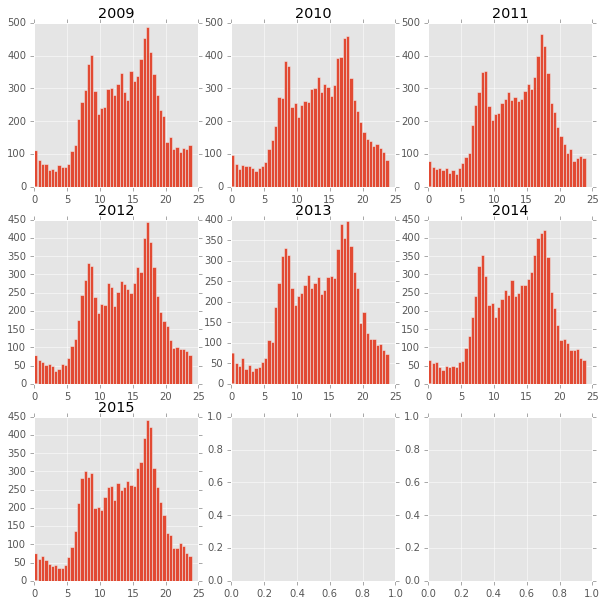

In [4]:
years = ['2009', '2010', '2011', '2012', '2013', '2014', '2015']
nfig = 0
fig, axes = plt.subplots(nrows=3, ncols=3)
print 'Rural area'
for year in years:
    df = pd.read_csv('data2/Accidents_SelectedRoad'+ year +'.csv',low_memory=False)
    df = df[df['Urban_or_Rural_Area'] == 2] # Urban area
    times = df['Time'].values
    n = len(times)
    hour = pd.Series([0.0]*n)
    i = 0
    for t in times:
        hm = t.split(':')
        hour[i] = float(hm[0]) + float(hm[1])/60
        i+=1
    hour.hist(bins = 48, ax=axes[int(nfig/3), nfig%3], figsize = (10,10))
    axes[int(nfig/3), nfig%3].set_title(year);
    nfig+=1

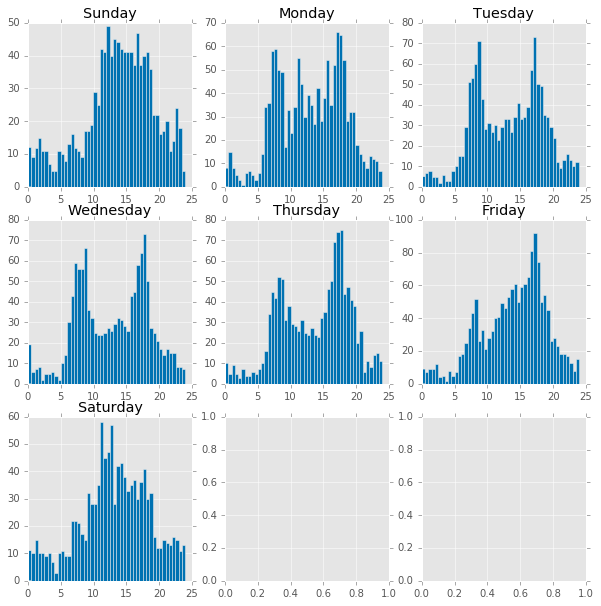

In [5]:
week = range(1,8)
day_of_week = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df = pd.read_csv('data2/Accidents_SelectedRoad2015.csv',low_memory=False)
fig, axes = plt.subplots(nrows=3, ncols=3)
nfig = 0
for day in week:
    df1 = df[df['Day_of_Week']==day]
    df1 = df1[df1['Urban_or_Rural_Area'] == 2] # rural area
    times = df1['Time'].values
    n = len(times)
    hour = pd.Series([0.0]*n)
    i = 0
    for t in times:
        hm = t.split(':')
        hour[i] = float(hm[0]) + float(hm[1])/60
        i+=1
    hour.hist(bins = 48, ax=axes[int(nfig/3), nfig%3], figsize = (10,10),color = '#0072B2')
    axes[int(nfig/3), nfig%3].set_title(day_of_week[nfig]);
    nfig+=1
plt.savefig('image/time48_weekday_2015.eps',format="eps",transparent=True, bbox_inches='tight', pad_inches=0.1)

Urban Area


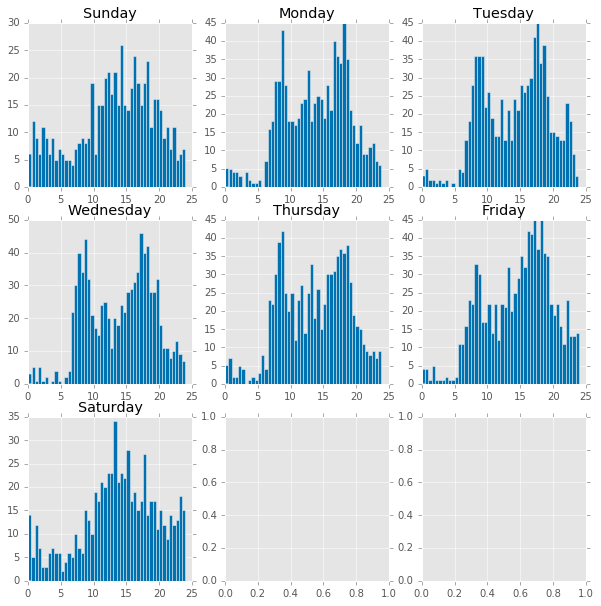

In [7]:
week = range(1,8)
day_of_week = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df = pd.read_csv('data2/Accidents_SelectedRoad2014.csv',low_memory=False)
fig, axes = plt.subplots(nrows=3, ncols=3)
nfig = 0
print 'Urban Area'
for day in week:
    df1 = df[df['Day_of_Week']==day]
    df1 = df1[df1['Urban_or_Rural_Area'] == 1] # urban area
    times = df1['Time'].values
    n = len(times)
    hour = pd.Series([0.0]*n)
    i = 0
    for t in times:
        hm = t.split(':')
        hour[i] = float(hm[0]) + float(hm[1])/60
        i+=1
    hour.hist(bins = 48, ax=axes[int(nfig/3), nfig%3], figsize = (10,10),color = '#0072B2')
    axes[int(nfig/3), nfig%3].set_title(day_of_week[nfig]);
    nfig+=1
plt.savefig('image/time48_weekday_2015.eps',format="eps",transparent=True, bbox_inches='tight', pad_inches=0.1)